In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
book_df = pd.read_csv('book_review.csv',encoding='latin-1')

In [3]:
book_df.head()

,ratings,reviews
0,5,"When Jennifer, a college student, returns to h..."
1,5,Growing up in the Appalachian mountains of sou...
2,5,"âThe heat is lifting some now, so a little w..."
3,5,"When I was growing up, all family history was ..."
4,5,This is a story about five generations of the ...


In [4]:
# Function to clean text fom any kind of punctuation and other symbols
import re
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s\d]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    cleaned_text = cleaned_text.strip()
    return cleaned_text

In [5]:
# Basic Preprocessing
import contractions
book_df['reviews'] = book_df['reviews'].str.lower()
book_df['reviews'] = book_df['reviews'].apply(clean_text)
book_df['reviews'] = book_df['reviews'].apply(contractions.fix)

In [6]:
book_df['reviews']

0        when jennifer a college student returns to her...
1        growing up in the appalachian mountains of sou...
2        the heat is lifting some now so a little wind ...
3        when i was growing up all family history was o...
4        this is a story about five generations of the ...
                               ...                        
66587    what she had realized was that love was that m...
66588    when i watched the films i had no idea they we...
66589    claire foy as lisbeth salanderin this continua...
66590    my alltime favorite badass heroine returns in ...
66591    25 starsthis should never have happened despit...
Name: reviews, Length: 66592, dtype: object

In [7]:
review_len = []
for review in book_df['reviews']:
    review_len.append(len(review))

In [8]:
book_df['review_len'] = review_len 

In [9]:
total_words = []
for review in book_df['reviews']:
    total_words.append(len(review.split()))

In [10]:
book_df['total_words'] = total_words

In [11]:
# Check Some of reviews
print(book_df['reviews'][5])
print("#"*30)
print(book_df['reviews'][50])
print("#"*30)
print(book_df['reviews'][100])
print("#"*30)
print(book_df['reviews'][500])
print("#"*30)
print(book_df['reviews'][1000])

oral history has two meanings here on one hand it refers to outsiders or foreigners as they were known in the hill country who came in to listen to stories and songs from the oldtimers to give them a sense of how it used to be it was also the only way those oldtimers had to convey family history and community lore in the mountains before modern roads and communications brought the rest of the world crashing in for better or worse lee smith has given us a novel that puts us squarely in the world of the cantrells of hoot owl holler starting with the old ways and superstitions of the past and wrapping it up in the modern era leaving us to wonder which is better after allat my age i have a foot in both camps as does lee smith and she loves and knows her characters in addition to telling a riveting story that was hard for me to put down i reveled in the language and the words that i can remember hearing in my childhood along with the superstitions and old wives tales that i heard and still 

In [12]:
book_df.head()

,ratings,reviews,review_len,total_words
0,5,when jennifer a college student returns to her...,234,44
1,5,growing up in the appalachian mountains of sou...,1843,328
2,5,the heat is lifting some now so a little wind ...,4016,746
3,5,when i was growing up all family history was o...,2106,400
4,5,this is a story about five generations of the ...,3962,710


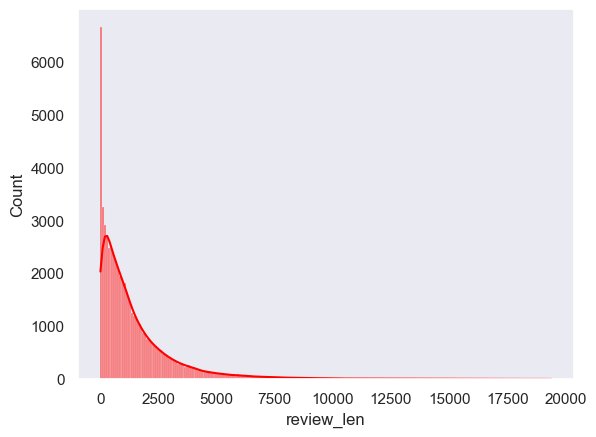

In [13]:
#Checking distrubution of reviews length
sns.histplot(book_df['review_len'],color='red',kde=True)
plt.grid(False)
plt.show()

In [14]:
indexes = book_df[book_df['review_len']<10].index

In [15]:
book_df.drop(indexes,axis=0,inplace=True)

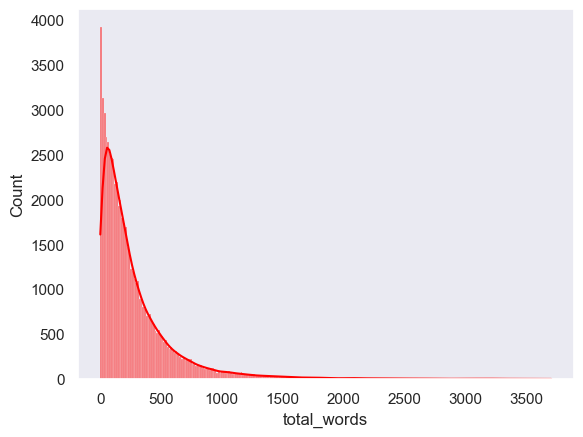

In [16]:
#Checking distrubution of total words
sns.histplot(book_df['total_words'],color='red',kde=True)
plt.grid(False)
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
# checking categories of dataset
book_df['ratings'].unique()

array([5, 2, 4, 3, 1], dtype=int64)

In [19]:
from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [20]:
status = []
for i in book_df['reviews']:
    status.append(is_english(i))

In [21]:
book_df['english_status'] = status

In [22]:
book_df['english_status'].dtype

dtype('bool')

In [23]:
false_indexes = book_df[book_df['english_status']==False].index

In [24]:
book_df.drop(false_indexes,axis=0,inplace=True)

In [25]:
# Checking data imbalance
book_df['ratings'].value_counts()

ratings
5    25314
4    17737
3     6517
1     4881
2     4716
Name: count, dtype: int64

In [26]:
# since data is imbalance, hence, splitting ham and spam seperately to make balance data
rating_5 = book_df[book_df['ratings']==5]
rating_4 = book_df[book_df['ratings']==4]
rating_3 = book_df[book_df['ratings']==3]
rating_2 = book_df[book_df['ratings']==2]
rating_1 = book_df[book_df['ratings']==1]

In [27]:
print(rating_5.shape,rating_4.shape,rating_3.shape,rating_2.shape,rating_1.shape)

(25314, 5) (17737, 5) (6517, 5) (4716, 5) (4881, 5)


In [28]:
rating_4 = rating_4.sample(rating_5.shape[0], replace=True)
rating_3 = rating_3.sample(rating_5.shape[0], replace=True)
rating_2 = rating_2.sample(rating_5.shape[0], replace=True)
rating_1 = rating_1.sample(rating_5.shape[0], replace=True)

In [29]:
print(rating_5.shape,rating_4.shape,rating_3.shape,rating_2.shape,rating_1.shape)

(25314, 5) (25314, 5) (25314, 5) (25314, 5) (25314, 5)


In [30]:
# Concatenate the DataFrames vertically in the specified order
book_df = pd.concat([rating_5, rating_4, rating_3, rating_2, rating_1], ignore_index=True)

In [31]:
book_df.shape

(126570, 5)

In [32]:
#Splitting data into dependent and indepent variable
x = book_df['reviews']
y = book_df['ratings']

In [33]:
x.head()

0    when jennifer a college student returns to her...
1    growing up in the appalachian mountains of sou...
2    the heat is lifting some now so a little wind ...
3    when i was growing up all family history was o...
4    this is a story about five generations of the ...
Name: reviews, dtype: object

In [34]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: ratings, dtype: int64

In [35]:
from nltk.corpus import stopwords
# Get NLTK's English stop words
nltk_stop_words = stopwords.words('english')

In [36]:
# Preprocess the text data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words=nltk_stop_words)  # Adjust max_features as needed
x_tfidf = tfidf_vectorizer.fit_transform(x)

In [37]:
x_tfidf

<126570x300922 sparse matrix of type '<class 'numpy.float64'>'
	with 14944864 stored elements in Compressed Sparse Row format>

In [38]:
# Train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,train_size=.80,stratify=y,random_state=121)

## Naive Bayes Model 

In [48]:
# Model building Naive Bayes
model = MultinomialNB()
# Training the model with the training data
model.fit(x_train, y_train)
# Predicting the test data categories
predicted_categories = model.predict(x_test)

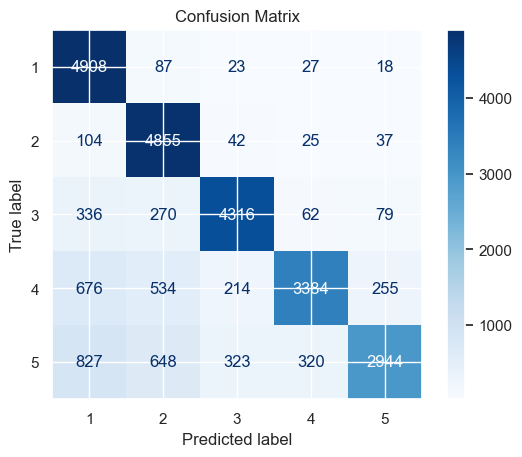

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming predicted_categories are the predicted labels for x_test
confusion = confusion_matrix(y_test, predicted_categories)

class_names = np.unique(np.concatenate((y_test, predicted_categories), axis=0))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [50]:
accuracy = accuracy_score(y_test, predicted_categories)
print("Accuracy:", accuracy)

Accuracy: 0.8061546970056096


## Logistic Regression Model

In [101]:
#Model Building Logistic Regression
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', C=10)
# Training Model with training data 
model_1.fit(x_train,y_train)
# Predicting the test data categories
pred = model_1.predict(x_test)

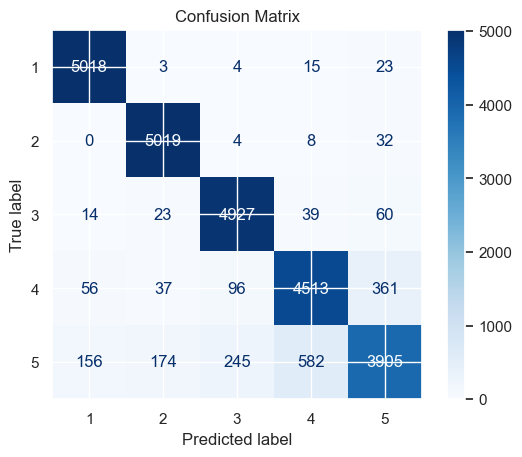

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming predicted_categories are the predicted labels for x_test
confusion = confusion_matrix(y_test, pred)

class_names = np.unique(np.concatenate((y_test, pred), axis=0))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [103]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9236785968238919
